# Education Desert maps

10, 20, 50 mi radii around higher education institutions. *What parts of the country are left out?*

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from pathlib import Path

from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'23-Apr-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutional_characteristics.csv
    + processed_data.csv


In [4]:
county_data = pd.read_csv(PROCESSED_DATA / 'counties.csv')

In [5]:
county_data.head().T

,0,1,2,3,4
geoid,1001,1003,1005,1007,1009
name,"Autauga County, Alabama","Baldwin County, Alabama","Barbour County, Alabama","Bibb County, Alabama","Blount County, Alabama"
universe,55200,208107,25782,22527,57645
white_alone,41412,172768,11898,16801,50232
black_alone,10475,19529,12199,4974,820
american_indian_and_alaska_native,159,1398,63,8,124
asian_alone,568,1668,85,37,198
native_hawaiian_and_pacific_islander,5,9,1,0,18
other_alone,41,410,86,0,174
two_or_more_races,1012,2972,344,160,818


In [6]:
institutions_data = pd.read_csv(PROCESSED_DATA / 'institutional_characteristics.csv')

In [7]:
institutions_data.head().T

,0,1,2,3,4
institution_name,Aaniiih Nakoda College,Abilene Christian University,Abraham Baldwin Agricultural College,Abraham Lincoln University,Academy College
longitude,-108.758,-99.7098,-83.5283,-118.257,-93.2998
latitude,48.4842,32.4689,31.4819,34.1463,44.8557
fips_state_code,Montana,Texas,Georgia,California,Minnesota
total_enrollment,150,5204,4291,217,99
full-time_enrollment,108,3730,2660,194,81
part-time_enrollment,42,1474,1631,23,18
control,Public,Private not-for-profit,Public,Private for-profit,Private for-profit
level,2-year,4-year or above,4-year or above,4-year or above,4-year or above


In [8]:
county_shapes = gpd.read_file(PROCESSED_DATA / 'geodata' / 'tl_2019_us_county.shp')

In [9]:
county_shapes.head().T

,0,1,2,3,4
STATEFP,31,53,35,31,31
COUNTYFP,039,069,011,109,129
COUNTYNS,00835841,01513275,00933054,00835876,00835886
GEOID,31039,53069,35011,31109,31129
NAME,Cuming,Wahkiakum,De Baca,Lancaster,Nuckolls
NAMELSAD,Cuming County,Wahkiakum County,De Baca County,Lancaster County,Nuckolls County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,None,339,None


In [10]:
import us

In [11]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
mask_contiguous_fips = county_shapes['STATEFP'].isin(contiguous_fips)
county_shapes = county_shapes[mask_contiguous_fips]

In [12]:
contiguous_states = [state.name for state in us.STATES_CONTIGUOUS]
mask_contiguous_states = institutions_data['fips_state_code'].isin(contiguous_states)
institutions_data = institutions_data[mask_contiguous_states]

In [13]:
geo_institutions = gpd.GeoDataFrame(institutions_data, geometry=gpd.points_from_xy(institutions_data['longitude'], institutions_data['latitude']))

In [14]:
geo_institutions.crs

In [15]:
county_shapes.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
geo_institutions.crs = county_shapes.crs

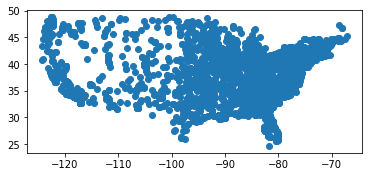

In [17]:
geo_institutions.plot();

[EPSG: 4269](https://epsg.io/4269) uses degrees as its units of measure, we need to change that to meters so we can create _buffers_ of 10, 25, 50 miles around each institution.

[EPSG: 3857](https://epsg.io/3857)

In [18]:
geo_institutions_in_meters = geo_institutions.to_crs(epsg=3857)

In [19]:
geo_institutions_in_meters.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level,geometry
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year,POINT (-12106865.248 6187788.921)
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above,POINT (-11099644.203 3825025.076)
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above,POINT (-9298325.521 3695490.591)
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above,POINT (-13164278.575 4048462.492)
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above,POINT (-10386087.216 5598836.632)


In [20]:
miles = 1609 # meters

In [21]:
institutions_10mi_radius = geo_institutions_in_meters.copy()
institutions_10mi_radius['geometry'] = institutions_10mi_radius['geometry'].buffer(10 * miles)

In [22]:
institutions_25mi_radius = geo_institutions_in_meters.copy()
institutions_25mi_radius['geometry'] = institutions_10mi_radius['geometry'].buffer(25 * miles)

In [23]:
institutions_50mi_radius = geo_institutions_in_meters.copy()
institutions_50mi_radius['geometry'] = institutions_50mi_radius['geometry'].buffer(50 * miles)

In [24]:
institutions_10mi_radius.to_crs(epsg=4269, inplace=True)
institutions_25mi_radius.to_crs(epsg=4269, inplace=True)
institutions_50mi_radius.to_crs(epsg=4269, inplace=True)

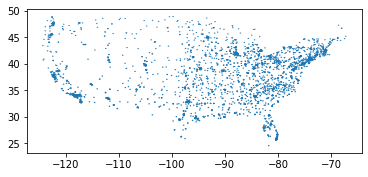

In [25]:
institutions_10mi_radius.plot();

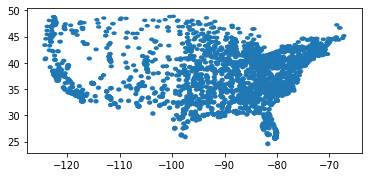

In [26]:
institutions_25mi_radius.plot();

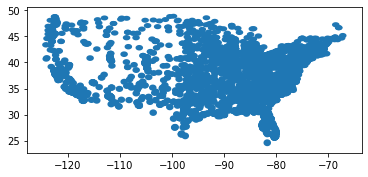

In [27]:
institutions_50mi_radius.plot();

https://geopandas.org/set_operations.html

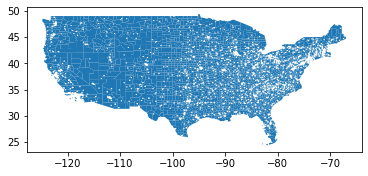

In [28]:
gpd.overlay(county_shapes, institutions_10mi_radius, how = 'difference').plot();

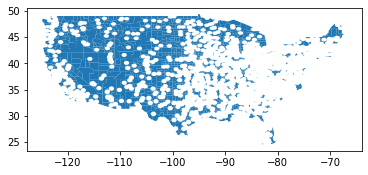

In [29]:
gpd.overlay(county_shapes, institutions_25mi_radius, how = 'difference').plot();

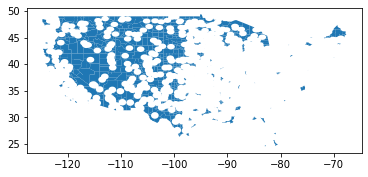

In [30]:
gpd.overlay(county_shapes, institutions_50mi_radius, how = 'difference').plot();

but overlay actually returns a geodataframe which we can use with geoplot!

In [31]:
gpd.overlay(county_shapes, institutions_50mi_radius, how = 'difference')

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.66916 33.99850, -104.67544 33.9..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-97.82070 40.23702, -97.82070 40.236..."
7,48,327,01383949,48327,Menard,Menard County,06,H1,G4020,None,None,None,A,2336237982,613559,+30.8852677,-099.8588613,"POLYGON ((-99.82187 31.08721, -99.81877 31.087..."
16,55,111,01581115,55111,Sauk,Sauk County,06,H1,G4020,357,12660,None,A,2153685971,45692999,+43.4280010,-089.9433184,"POLYGON ((-90.19196 43.55500, -90.19676 43.554..."
18,41,063,01155135,41063,Wallowa,Wallowa County,06,H1,G4020,None,None,None,A,8147835329,14191752,+45.5937530,-117.1855796,"POLYGON ((-117.56389 45.99849, -117.56240 45.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,29,143,00758526,29143,New Madrid,New Madrid County,06,H1,G4020,None,None,None,A,1747873649,56238249,+36.5942608,-089.6559485,"POLYGON ((-89.70202 36.71552, -89.70211 36.718..."
3222,29,029,00758469,29029,Camden,Camden County,06,H1,G4020,None,None,None,A,1699143493,136285342,+38.0265275,-092.7653271,"POLYGON ((-93.06241 38.11814, -93.06239 38.118..."
3225,40,047,01101811,40047,Garfield,Garfield County,06,H1,G4020,None,21420,None,A,2741521308,4075930,+36.3780539,-097.7884503,"POLYGON ((-98.00489 36.56655, -98.00470 36.565..."
3226,53,059,01529220,53059,Skamania,Skamania County,06,H1,G4020,440,38900,None,A,4294930645,73290050,+46.0247853,-121.9532319,"POLYGON ((-122.24108 46.27825, -122.24100 46.2..."


TODO

attach county data, share underrepresented, hh income, median age, to these dataframes.

# Data preparation

In [32]:
county_data.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [33]:
county_data['share_underrepresented'] = (county_data['black_alone'] + 
    county_data['american_indian_and_alaska_native'] + 
    county_data['native_hawaiian_and_pacific_islander'] + 
    county_data['latino_alone']) / county_data['universe']

In [34]:
county_data['geoid'] = county_data['geoid'].astype(str).str.zfill(5)

county_data = county_data[['geoid', 'name', 'universe', 'share_underrepresented']]
county_data.set_index('geoid', inplace = True)

In [35]:
median_age = pd.read_csv(EXTERNAL_DATA / 'processed' / 'acs5_2018_medianage_counties.csv')
median_hh_income = pd.read_csv(EXTERNAL_DATA / 'processed' / 'acs5_2018_medianhouseholdincome_counties.csv')

In [36]:
median_age.head()

,geoid,name,median,median_annotation,median_moe,median_moe_annotation,male,male_annotation,male_moe,male_moe_annotation,female,female_annotation,female_moe,female_moe_annotation,state,county
0,30019,"Daniels County, Montana",50.7,NaN,4.9,NaN,49.4,NaN,7.5,NaN,52.3,NaN,6.3,NaN,30,19
1,72073,"Jayuya Municipio, Puerto Rico",37.8,NaN,0.9,NaN,36.1,NaN,1.1,NaN,40.1,NaN,2.5,NaN,72,73
2,39173,"Wood County, Ohio",34.8,NaN,0.2,NaN,33.6,NaN,0.3,NaN,36.0,NaN,0.3,NaN,39,173
3,24023,"Garrett County, Maryland",45.6,NaN,0.3,NaN,44.4,NaN,0.4,NaN,47.0,NaN,0.5,NaN,24,23
4,30079,"Prairie County, Montana",51.8,NaN,7.0,NaN,53.0,NaN,7.5,NaN,49.7,NaN,6.8,NaN,30,79


In [37]:
median_hh_income.head()

,geoid,name,median,median_annotation,median_moe,median_moe_annotation,state,county
0,30019,"Daniels County, Montana",54750.0,NaN,2497.0,NaN,30,19
1,72073,"Jayuya Municipio, Puerto Rico",15424.0,NaN,2978.0,NaN,72,73
2,39173,"Wood County, Ohio",59789.0,NaN,1513.0,NaN,39,173
3,24023,"Garrett County, Maryland",49619.0,NaN,1948.0,NaN,24,23
4,30079,"Prairie County, Montana",47250.0,NaN,6386.0,NaN,30,79


In [38]:
# fix geoid
median_age['geoid'] = median_age['geoid'].astype(str).str.zfill(5)
median_hh_income['geoid'] = median_hh_income['geoid'].astype(str).str.zfill(5)

In [39]:
median_age = median_age[['geoid', 'median', 'male', 'female']]
median_age.columns = ['geoid', 'median_age', 'median_age_male', 'median_age_female']
median_age.set_index('geoid', inplace = True)

In [40]:
median_hh_income = median_hh_income[['geoid', 'median']]
median_hh_income.columns = ['geoid', 'median_hh_income']
median_hh_income.set_index('geoid', inplace=True)

In [41]:
county_shapes = county_shapes[['GEOID', 'geometry']]
county_shapes.set_index("GEOID", inplace = True)

In [42]:
working_gdf = county_shapes.join(county_data).join(median_age).join(median_hh_income)

working_gdf.head()

,geometry,name,universe,share_underrepresented,median_age,median_age_male,median_age_female,median_hh_income
GEOID,,,,,,,,
31039,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...","Cuming County, Nebraska",8991.0,0.102769,43.6,43.5,43.7,55190.0
53069,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...","Wahkiakum County, Washington",4189.0,0.088327,54.3,54.0,54.5,54085.0
35011,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...","De Baca County, New Mexico",2060.0,0.476699,37.0,36.2,37.7,31028.0
31109,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...","Lancaster County, Nebraska",310094.0,0.112537,33.3,32.5,34.3,58009.0
31129,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...","Nuckolls County, Nebraska",4275.0,0.029474,49.3,46.8,52.5,42049.0


In [43]:
ten_miles = gpd.overlay(working_gdf, institutions_10mi_radius, how = 'difference')
twentyfive_miles = gpd.overlay(working_gdf, institutions_25mi_radius, how = 'difference')
fifty_miles = gpd.overlay(working_gdf, institutions_50mi_radius, how = 'difference')

In [44]:
ten_miles_inter = gpd.overlay(working_gdf, institutions_10mi_radius, how = 'intersection')
twentyfive_miles_inter = gpd.overlay(working_gdf, institutions_25mi_radius, how = 'intersection')
fifty_miles_inter = gpd.overlay(working_gdf, institutions_50mi_radius, how = 'intersection')

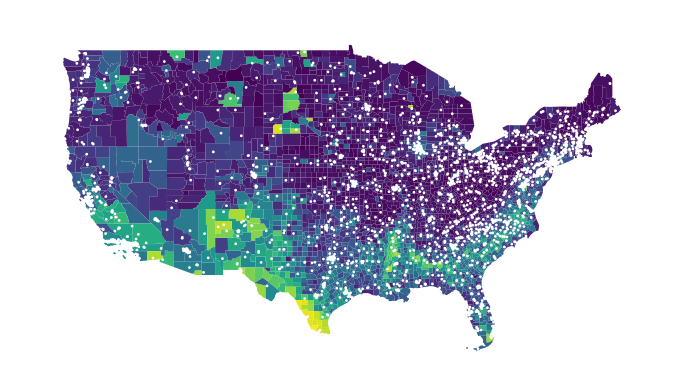

In [45]:
gplt.choropleth(ten_miles, projection=gcrs.WebMercator(), hue = 'share_underrepresented', figsize=(12,12),)

In [46]:
import matplotlib.colors as mc

In [47]:
univ_norm = mc.Normalize(ten_miles['universe'].min(), ten_miles['universe'].quantile(0.90))

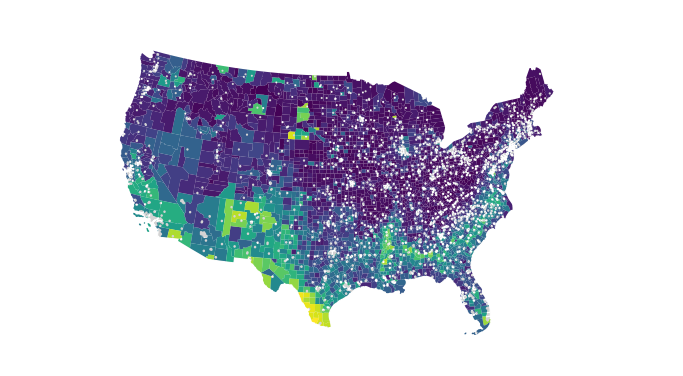

In [48]:
proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    county_shapes,     
    zorder=-1,
    projection = proj,
    linewidth=1,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12),
)
gplt.choropleth(ten_miles, hue = 'share_underrepresented', ax = ax)

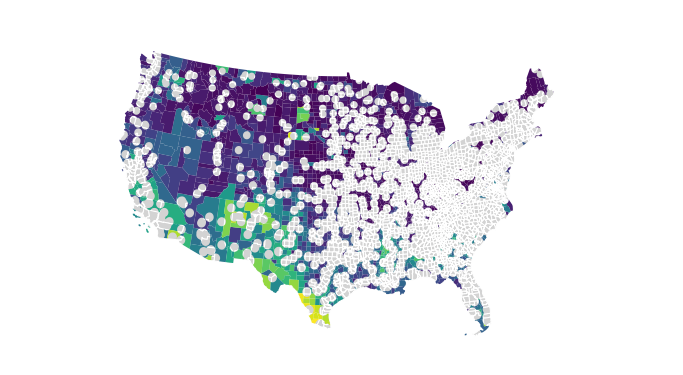

In [49]:
proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    county_shapes,     
    zorder=-1,
    projection = proj,
    linewidth=1,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12),
)
gplt.choropleth(twentyfive_miles, hue = 'share_underrepresented', ax = ax)

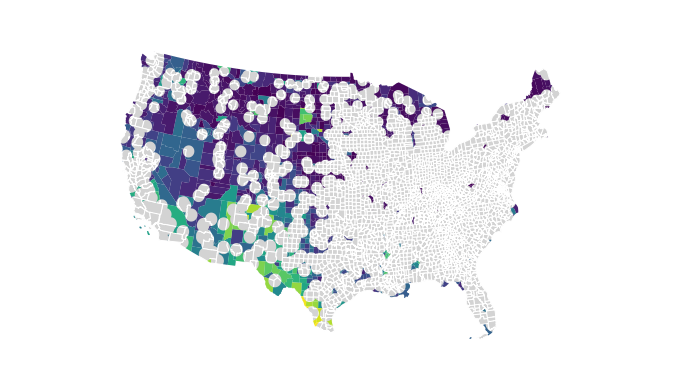

In [50]:
proj = gcrs.AlbersEqualArea()

ax = gplt.polyplot(
    county_shapes,     
    zorder=-1,
    projection = proj,
    linewidth=1,
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12),
)
gplt.choropleth(fifty_miles, hue = 'share_underrepresented', ax = ax)

***
pause

In [51]:
def make_cool_map(gdf, var_of_interest, ax, projection = gcrs.AlbersEqualArea(),):
    """makes a cool choropleth map from our data
    """
    proj = gcrs.AlbersEqualArea()

    ax = gplt.polyplot(
        county_shapes,     
        zorder=-1,
        projection = proj,
        linewidth=1,
        edgecolor='white',
        facecolor='lightgray',
        ax = ax,
    )
    
    gplt.choropleth(
        gdf, 
        hue = var_of_interest, 
        ax = ax, 
    )

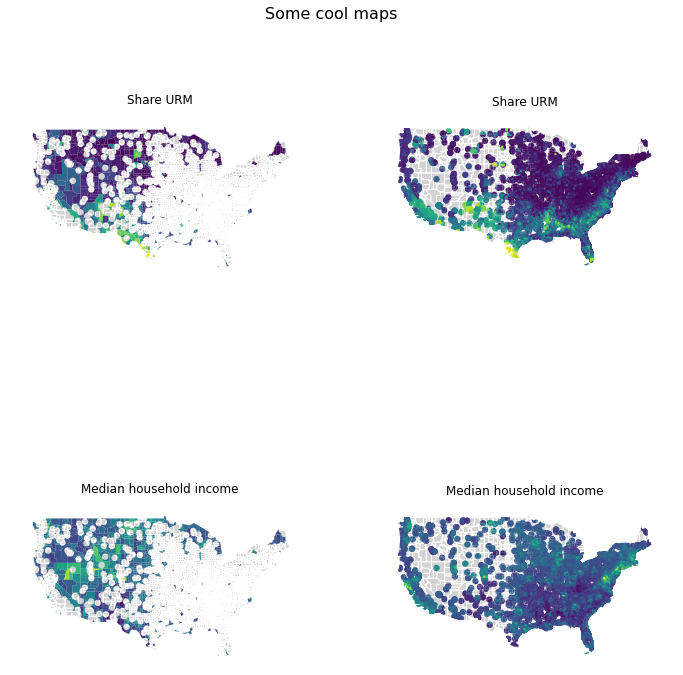

In [52]:
proj = gcrs.WebMercator()
f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': proj})

plt.suptitle('Some cool maps', fontsize=16)
plt.subplots_adjust(top=0.95)

make_cool_map(fifty_miles, 'share_underrepresented', axarr[0][0])
axarr[0][0].set_title('Share URM')

make_cool_map(fifty_miles_inter, 'share_underrepresented', axarr[0][1])
axarr[0][1].set_title('Share URM')

make_cool_map(fifty_miles, 'median_hh_income', axarr[1][0])
axarr[1][0].set_title('Median household income')

make_cool_map(fifty_miles_inter, 'median_hh_income', axarr[1][1])
axarr[1][1].set_title('Median household income')

plt.savefig("test.png", bbox_inches='tight')